# Homework 3


#### 1. Lecture 3의 중심극한정리 부분에서 지수분포(exponential distribution)을 사용하였다. 지수분포는 아래와 같은 확률밀도함수를 갖는다. 
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5a9fdb86104f54ca275a0c340c25d88afff540ae">

#### Lecture 3에서는 $\lambda=1$(default; exp(1))를 사용하였고 이 때 지수분포를 따르는 확률변수의 기대값과 분산은 1로 알려져있다. 

#### (a) 아래의 과정에 따라 표본을 추출하여 저장하시오. 
- exp(1)에서 100000개의 무작위표본을 추출하여  `pop`의 이름으로 저장하시오. 
- exp(1)에서 30개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여 `sample_mean1`으로 저장하시오.
- exp(1)에서 100개의 무작위 표본을 1000번 추출하여 표본평균 1000개를 계산하여  `sample_mean2`로 저장하시오

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
n1 = 30
n2 = 100
n = 100000
import seaborn as sns
import matplotlib.pylab as plt
np.random.seed(seed=0)

In [2]:
pop = stats.expon.rvs(size=100000)
sample_1 = stats.expon.rvs(size=30*1000)
sample_2 = stats.expon.rvs(size=100*1000)
sample_1 = np.reshape(sample_1,[30,1000])
sample_2 = np.reshape(sample_2,[100,1000])
sample_mean1 = sample_1.mean(axis=0)
sample_mean2 = sample_2.mean(axis=0)

#### (b) 위에서 저장한 `pop`, `sample_mean1`, `sample_mean2`의 히스토그램을 그려 저장하고 그 모양을 비교서술하시오. 

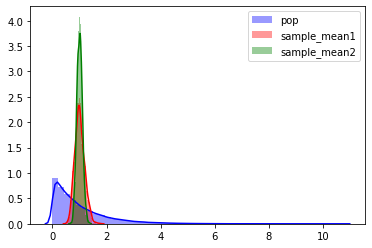

In [3]:
sns.distplot(pop, 

             color="blue", label="pop")



sns.distplot(sample_mean1, 

             color="red", label="sample_mean1")



sns.distplot(sample_mean2, 

             color="green", label="sample_mean2")


plt.legend()
plt.show()

### pop은 표본의 확률 분포 인데 표본을 추출 할때 마다 모집단의 평균과 같지 않을수 있다는 것을 보여준다.
### sample_mean1 과 sample_mean2 를 비교하면 표본의 평균들인데 표본의 갯수가 많을 수록 모집단의 평균과 같아질 확률이 높아진다.

#### (c) 이론적으로 계산했을 때 `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산은 무엇이 될 것이라고 추측하는가?

이론적으로는 모두 1 입니다

#### (d)  `pop`, `sample_mean1`, `sample_mean2`의 평균과 분산을 계산하여 (c)에서 추측한 값과 가까운 값인지 확인하시오. 

In [4]:
pop.mean(),sample_mean1.mean(),sample_mean2.mean()

(0.9996779742710051, 1.0081758034605328, 1.0041032416182085)

#### 2. 	개인이 지불하는 자동차 보험료의 연간 평균은 687달러이다. 이 값을 모집단 평균으로 하고 모집단의 표준편차가 230달러이다. 45개의 자동차 보험계약을 생각해보자. 45개 보험료의 평균이 모집단 평균의 +-25달러 이내에 있을 확률은 얼마인가?


In [5]:
from scipy.stats import norm

In [6]:
p_hat = 687
std_hat = 230/np.sqrt(45)
stats.norm.cdf(687+25, loc = p_hat, scale = std_hat ) - stats.norm.cdf(687-25, loc = p_hat, scale = std_hat )

0.5340916787127394

#### 3. `airbnb.csv` 데이터셋을 사용하여 샌프란시스코 전체 리스팅의 `reviews_per_month`의 평균을 95% 신뢰구간으로 추정하고 해석하시오. 

In [7]:
import statsmodels.stats.weightstats as weightstats

In [13]:
data = pd.read_csv("./airbnb.csv")
reviews_per_month = weightstats.DescrStatsW(data.reviews_per_month)
lower,upper = reviews_per_month.tconfint_mean(alpha=0.05)
print("lower: {:.4f} upper:  {:.4f}".format(lower,upper))

lower: 1.8358 upper:  1.9407


### reviews_per_month의 평균은 1.8358 과 1.9407 사이일 가능성이 95%